<a href="https://colab.research.google.com/github/emiliomercuri/hidrologia/blob/main/notebooks/Exemplo_aula_C%C3%A1lculo_da_Precipita%C3%A7%C3%A3o_Efetiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cálculo da Precipitação Efetiva (Excesso de Chuva)

In [1]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy
import pandas
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

### Exercício

A partir da chuva observada e dados de vazão fornecidos na Tabela abaixo, determine:

1. o hidrograma de escoamento direto (Runoff)
2. o índice $\phi$ e 
3. o hietograma de precipitação efetiva

A área da bacia hidrográfica é de 4 km$^2$.

## Leitura dos dados

In [2]:
dateparse = lambda x: pandas.datetime.strptime(x, '%Y-%m-%d %H:%M')
dados=pandas.read_csv('https://www.dropbox.com/s/obni3violih7625/tabela_ok.csv?dl=1',sep=';',date_parser=dateparse,index_col=0)
dados

,Prec(mm),Vazao(m3/s)
Data-Hora,,
2020-05-24 20:30:00,NaN,9.0
2020-05-24 21:00:00,3.8,8.5
2020-05-24 21:30:00,6.6,8.0
2020-05-24 22:00:00,33.8,23.4
2020-05-24 22:30:00,55.9,65.8
2020-05-24 23:00:00,8.0,51.0
2020-05-24 23:30:00,NaN,22.6
2020-05-25 00:00:00,NaN,10.0
2020-05-25 00:30:00,NaN,7.5


## Gráfico Chuva-Vazão

Pluviograma + Hidrógrafa

<Figure size 640x480 with 0 Axes>

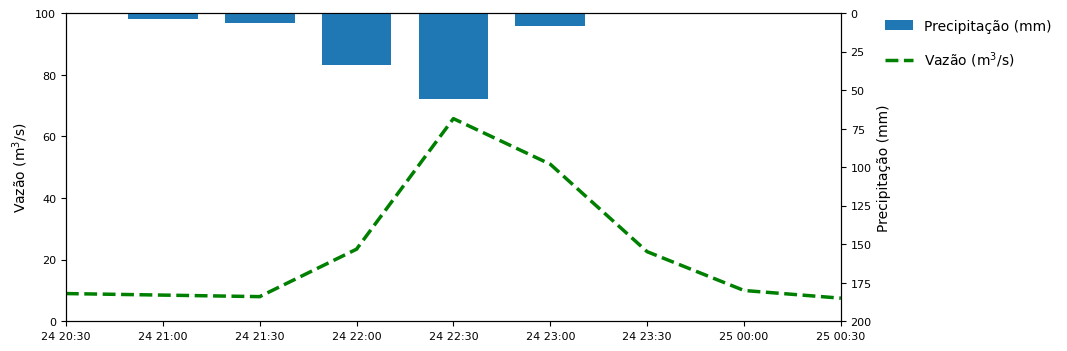

In [61]:
plt.gcf().autofmt_xdate()        
fig, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(dados['Vazao(m3/s)'],color='green', marker='o', linestyle='dashed',linewidth=2.5, markersize=0.1, label = r'Vazão (m$^3$/s)')
ax1.set_ylim(0,100)
ax1.margins(0.0)
ax1.tick_params(axis='both', labelsize=8) #increase font size for ticks
ax1.set_ylabel(r'Vazão (m$^3$/s)', fontsize=10) #y label
leg = plt.legend();
plt.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', borderaxespad=0.,frameon=False)

ax2 = ax1.twinx()
ax2.margins(0.0)
ax2.bar(dados.index,dados['Prec(mm)'], width=0.015, label = 'Precipitação (mm)')
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel('Precipitação (mm)', fontsize=10) #y label
ax2.set_ylim(200,0)

plt.tick_params(axis='both', labelsize=8) #increase font size for ticks
plt.xticks(rotation=45)
leg = plt.legend();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,frameon=False)

plt.savefig('chuva-vazao.png', dpi = 300, bbox_inches='tight')
plt.show()

### Solução em 5 passos

1. Estimativa do escoamento de base (EB)
2. Cálculo do Escoamento Superficial Direto (ED)
$$
\text{ED} = Q - \text{EB}
$$
3. Cálculo do Volume $V_d$ e altura do Escoamento Superficial $r_d$
$$
V_{d}=\sum_{n=1}^{N} Q_{n} \Delta t
$$
$$
r_{d}=\frac{V_{d}}{\text { área da bacia }}
$$

4. Estimativa das abstrações $\phi$ (Infiltração e Armazenamento Superficial)
$$
r_{d}=\sum_{m=1}^{M}\left(R_{m}-\phi \Delta t\right)
$$

5. Cálculo e gráfico do hietograma de precipitação efetiva



### 1. Estimativa do escoamento de base (EB)

<Figure size 640x480 with 0 Axes>

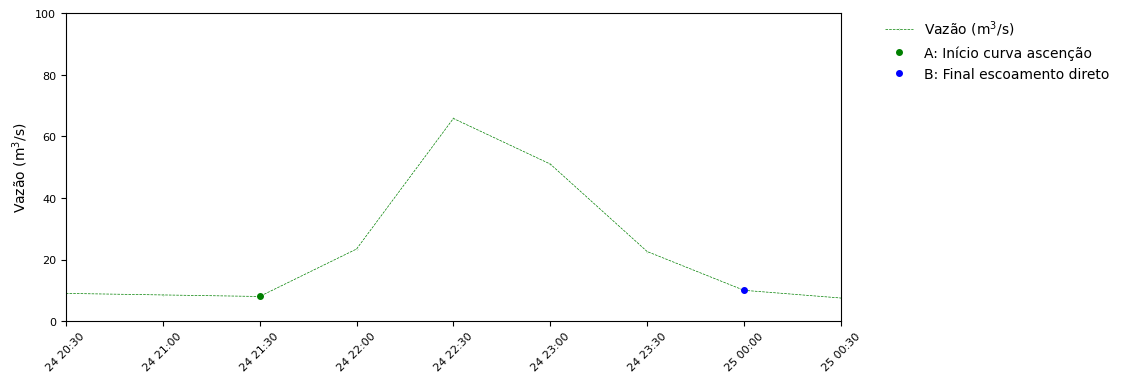

In [15]:
plt.gcf().autofmt_xdate()      
fig, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(dados['Vazao(m3/s)'],color='green', marker='o', linestyle='dashed',linewidth=0.5, markersize=0.1, label = r'Vazão (m$^3$/s)')
ax1.plot(dados['Vazao(m3/s)'][2:3],color='green', marker='o',linewidth=0, markersize=4, label = 'A: Início curva ascenção')
ax1.plot(dados['Vazao(m3/s)'][7:8],color='blue', marker='o',linewidth=0, markersize=4, label = 'B: Final escoamento direto')
ax1.set_ylim(0,100)
ax1.margins(0.0)
ax1.tick_params(axis='both', labelsize=8) #increase font size for ticks
ax1.set_ylabel(r'Vazão (m$^3$/s)', fontsize=10) #y label
leg = plt.legend();
plt.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', borderaxespad=0.,frameon=False)


plt.tick_params(axis='both', labelsize=8) #increase font size for ticks
plt.xticks(rotation=45)
leg = plt.legend();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,frameon=False)

plt.savefig('vazao+eb.png', dpi = 300, bbox_inches='tight')
plt.show()

In [23]:
print(r'Vazão A = ', dados['Vazao(m3/s)'][2:3].values, r'(m3/s)')
print(r'Vazão B = ', dados['Vazao(m3/s)'][7:8].values, r'(m3/s)')

Vazão A =  [8.] (m3/s)
Vazão B =  [10.] (m3/s)


Adotaremos um escoamento de base constante de 8 m$^3$/s.

In [24]:
EB = 8
a_serie = dados['Vazao(m3/s)'][2:3]
b_serie = dados['Vazao(m3/s)'][7:8]
base = pandas.concat([a_serie, b_serie], axis=0)

In [25]:
base[0] = EB
base[1] = EB
base

Data-Hora
2020-05-24 21:30:00    8.0
2020-05-25 00:00:00    8.0
Name: Vazao(m3/s), dtype: float64

<Figure size 640x480 with 0 Axes>

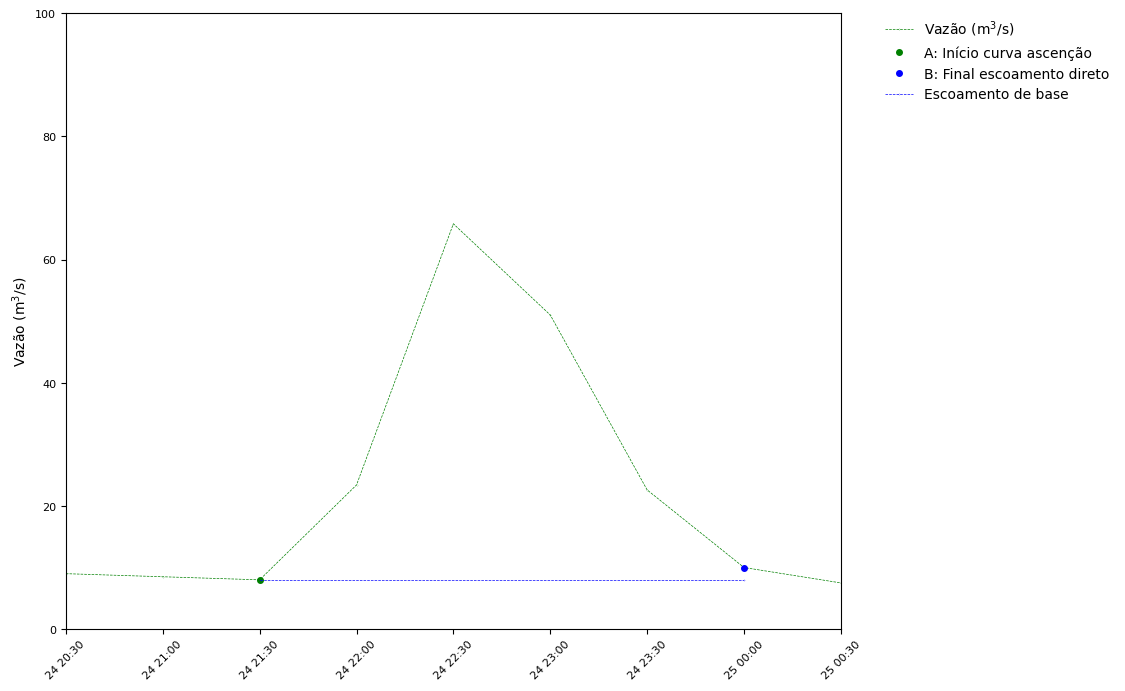

In [28]:
plt.gcf().autofmt_xdate()      
#plt.ylim(-0.00005,0.00005) 
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.plot(dados['Vazao(m3/s)'],color='green', marker='o', linestyle='dashed',linewidth=0.5, markersize=0.1, label = r'Vazão (m$^3$/s)')
ax1.plot(dados['Vazao(m3/s)'][2:3],color='green', marker='o',linewidth=0, markersize=4, label = 'A: Início curva ascenção')
ax1.plot(dados['Vazao(m3/s)'][7:8],color='blue', marker='o',linewidth=0, markersize=4, label = 'B: Final escoamento direto')
ax1.plot(base,color='blue', marker='o', linestyle='dashed',linewidth=0.5, markersize=0.1, label = 'Escoamento de base')

ax1.set_ylim(0,100)
ax1.margins(0.0)
ax1.tick_params(axis='both', labelsize=8) #increase font size for ticks
ax1.set_ylabel(r'Vazão (m$^3$/s)', fontsize=10) #y label
leg = plt.legend();
plt.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', borderaxespad=0.,frameon=False)


plt.tick_params(axis='both', labelsize=8) #increase font size for ticks
plt.xticks(rotation=45)
leg = plt.legend();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,frameon=False)

plt.savefig('vazao+eb.png', dpi = 300, bbox_inches='tight')
plt.show()

2. Cálculo e Gráfico do Escoamento Superficial Direto (ED)
$$
\text{ED} = Q - \text{EB}
$$

In [38]:
# somente iremos trabalhar com a parte do hidrograma que tem Precipitação Efetiva
selecao = dados['2020-05-24 22:00:00':'2020-05-25 00:00:00':]
selecao['ED(m3/s)'] = selecao['Vazao(m3/s)'] - EB

In [39]:
selecao

,Prec(mm),Vazao(m3/s),ED(m3/s)
Data-Hora,,,
2020-05-24 22:00:00,33.8,23.4,15.4
2020-05-24 22:30:00,55.9,65.8,57.8
2020-05-24 23:00:00,8.0,51.0,43.0
2020-05-24 23:30:00,NaN,22.6,14.6
2020-05-25 00:00:00,NaN,10.0,2.0


In [40]:
#contagem do número de dados válidos
contagem = numpy.arange(1,6,1)
contagem
selecao['tempo(1/2h)'] = contagem
selecao

,Prec(mm),Vazao(m3/s),ED(m3/s),tempo(1/2h)
Data-Hora,,,,
2020-05-24 22:00:00,33.8,23.4,15.4,1
2020-05-24 22:30:00,55.9,65.8,57.8,2
2020-05-24 23:00:00,8.0,51.0,43.0,3
2020-05-24 23:30:00,NaN,22.6,14.6,4
2020-05-25 00:00:00,NaN,10.0,2.0,5


3. Cálculo do Volume $V_d$ e altura do Escoamento Superficial $r_d$
$$
V_{d}=\sum_{n=1}^{N} Q_{n} \Delta t
$$
$$
r_{d}=\frac{V_{d}}{\text { área da bacia }}
$$

In [62]:
N = 5
dt = 0.5

somaES = selecao['ED(m3/s)'].sum()
print(somaES)

132.79999999999998


$$
\begin{aligned}
V_{d} &=\sum_{n=1}^{5} Q_{n} \Delta t \\
&=132.8 \, \mathrm{m}^3\mathrm{/s}  \times \frac{3600}{1} \frac{\mathrm{s}}{\mathrm{h}} \times \frac{1}{2} \mathrm{~h} \\
&=239040 \, \mathrm{m}^3 \\
r_{d} &=\frac{V_{d}}{\text { watershed area }} \\
&=\frac{239040 \mathrm{~m}^{3}}{4 \times 10^{6} \mathrm{~m}^{2} }\\
&=0.05976 \mathrm{~m} \\
&=59.8 \mathrm{~mm}
\end{aligned}
$$

In [43]:
Vd = somaES*3600/2
print(Vd, 'metros cúbicos')

239039.99999999997 metros cúbicos


In [45]:
area = 4 * 10**6 # área bacia (m2)
rd = Vd / area

In [46]:
print(rd, 'm')

0.059759999999999994 m


In [47]:
# convertendo para mm
print(rd*1000, 'mm')

59.75999999999999 mm


Arredondando, adotaremos rd = 59.8 mm

4. Estimativa das abstrações $\phi$ (Infiltração e Armazenamento Superficial)
$$
r_{d}=\sum_{m=1}^{M}\left(R_{m}-\phi \Delta t\right)
$$

Na equação acima temos duas incógnitas: $M$ e $\phi$.

* $M$: número de pulsos de precipitação total que constituem a precipitação efetiva
* $\phi$: abstrações (Infiltração e Armazenamento Superficial)

Para estimar o $\phi$ vamos fazer M variar de 1, 2, 3... e calculamos o $\phi$ (que deve ser um valor positivo). No nosso caso M pode variar de 1 a 5.

* se M = 1 o maior pulso de precipitação é 55.9:

$$
\begin{aligned}
r_{d} &=\sum_{m=1}^{M}\left(R_{m}-\phi \Delta t\right) \\
59.8 &=(55.9-\phi \times 0.5) \\
\phi &=-7.8 \, \mathrm{~mm} / \mathrm{h}
\end{aligned}
$$

Esse valor para $\phi$ é físicamente impossível


* se M = 2 o maior pulso de precipitação (durante dois intervalos de meia hora) é entre 22h e 23h = 33.2 + 55.9:

$$
\begin{aligned}
r_{d} &=\sum_{m=1}^{M}\left(R_{m}-\phi \Delta t\right) \\
59.8 &=(33.2 + 55.9-\phi \times 2 \times 0.5) \\
\phi &= 29.9 \, \mathrm{~mm} / \mathrm{h}
\end{aligned}
$$

Esse valor para $\phi$ é satisfatório pois ele fornece:

$$
\text { Abstrações } = \phi \Delta t= 14.95 \text { mm }
$$

e $\phi \Delta t$ é maior do que todos os pulsos de precipitação fora dos 2 pulsos que contribuem para o escoamento direto

5. Cálculo e gráfico do hietograma de precipitação efetiva


In [50]:
29.9/2

14.95

In [51]:
Abstracoes = 14.95

In [52]:
selecao['PrecEfet(mm)'] = selecao['Prec(mm)'] - Abstracoes
selecao['PrecEfet(mm)']

Data-Hora
2020-05-24 22:00:00    18.85
2020-05-24 22:30:00    40.95
2020-05-24 23:00:00    -6.95
2020-05-24 23:30:00      NaN
2020-05-25 00:00:00      NaN
Name: PrecEfet(mm), dtype: float64

In [54]:
# selecionando os valores maiores do que zero:
selecao_nova = selecao[selecao['PrecEfet(mm)'] > 0]

In [67]:
selecao_nova['abstracoes(mm)'] = Abstracoes
selecao_nova

,Prec(mm),Vazao(m3/s),ED(m3/s),tempo(1/2h),PrecEfet(mm),abstracoes(mm)
Data-Hora,,,,,,
2020-05-24 22:00:00,33.8,23.4,15.4,1,18.85,14.95
2020-05-24 22:30:00,55.9,65.8,57.8,2,40.95,14.95


In [59]:
dados['linha'] = Abstracoes

<Figure size 640x480 with 0 Axes>

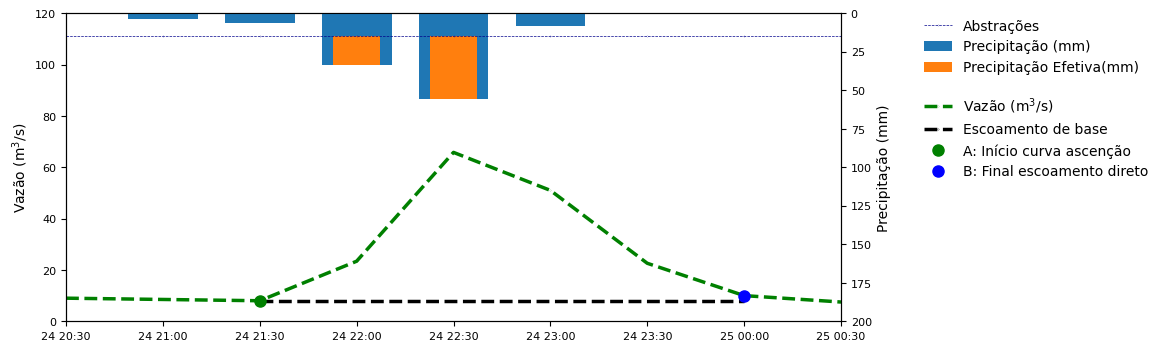

In [76]:
plt.gcf().autofmt_xdate()        
fig, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(dados['Vazao(m3/s)'],color='green', marker='o', linestyle='dashed',linewidth=2.5, markersize=0.1, label = r'Vazão (m$^3$/s)')
ax1.plot(base,color='black', marker='o', linestyle='dashed',linewidth=2.5, markersize=0.2, label = 'Escoamento de base')
ax1.plot(dados['Vazao(m3/s)'][2:3],color='green', marker='o',linewidth=0, markersize=8, label = 'A: Início curva ascenção')
ax1.plot(dados['Vazao(m3/s)'][7:8],color='blue', marker='o',linewidth=0, markersize=8, label = 'B: Final escoamento direto')
ax1.set_ylim(0,120)
ax1.margins(0.0)
ax1.tick_params(axis='both', labelsize=8) #increase font size for ticks
ax1.set_ylabel(r'Vazão (m$^3$/s)', fontsize=10) #y label
leg = plt.legend();
plt.legend(bbox_to_anchor=(1.1, 0.75), loc='upper left', borderaxespad=0.,frameon=False)

ax2 = ax1.twinx()
ax2.margins(0.0)
ax2.bar(dados.index,dados['Prec(mm)'], width=0.015, label = 'Precipitação (mm)')
ax2.bar(selecao_nova.index,selecao_nova['PrecEfet(mm)'], width=0.01, bottom = selecao_nova['abstracoes(mm)'],  label = 'Precipitação Efetiva(mm)')
ax2.plot(dados['linha'],color='darkblue', marker='o', linestyle='dashed',linewidth=0.5, markersize=0.1, label = 'Abstrações')
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel('Precipitação (mm)', fontsize=10) #y label
ax2.set_ylim(200,0)

plt.tick_params(axis='both', labelsize=8) #increase font size for ticks
plt.xticks(rotation=45)
leg = plt.legend();
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.,frameon=False)

plt.savefig('chuva-vazao.png', dpi = 300, bbox_inches='tight')
plt.show()